# Bayesian Inference with a Bernoulli variable

## Beta Conjugate Prior
The Beta distribution is conjugate here: when a Beta prior is input into Bayes theorum with Bernoulli or Binomial experimental data, the posterior will also be a Beta distribution.

Specifically, where $Y \sim \text{Bernoulli}\left(\theta\right)$, with the $n$ results of experiments on $Y$ being $\tilde{y}$, and the prior being $\theta \sim Beta(\alpha, \beta)$.

$$\theta \mid \tilde{y} \sim Beta\left(\alpha + \Sigma y_i, \beta + n - \Sigma y_i\right)$$


## Distributions and PDFs

### Prior distribution

$$\theta \sim Beta(\alpha, \beta)$$

$$f(\theta) = \frac{\Gamma\left(\alpha + \beta\right)}{\Gamma\left(\alpha\right)\Gamma\left(\beta\right)} \theta^{\alpha-1} (1-\theta)^{\beta-1} I_{0\le x\le1}$$

Effective Sample Size of prior: $\alpha + \beta$

Mean of Prior: $\frac{\alpha}{\alpha + \beta}$

### Target variable distribution

$$Y \sim \text{Bern}(\theta)$$

$$f(Y=y) = \theta^y (1-\theta)^{1-y} I_{y \in 0,1}$$

### Likelihood
$$f(\tilde{y} \mid \theta) = \theta^{\Sigma y_i} (1-\theta)^{n-\Sigma y_i}$$

### Posterior distribution

$$\theta \mid \tilde{y} \sim Beta\left(\alpha + \Sigma y_i, \beta + n - \Sigma y_i\right)$$

$$f(\theta \mid \tilde{y}) = \frac{\Gamma(\alpha+\beta+n)}{\Gamma(\alpha+\Sigma y_i)\Gamma(\beta+n-\Sigma y_i)} \theta^{\alpha + \Sigma y_i -1} (1-\theta)^{\beta + n - \Sigma y_i -1}$$

#### Posterior Mean

$$= \frac{\alpha+\beta}{\alpha+\beta+n}\cdot\frac{\alpha}{\alpha+\beta}+\frac{n}{\alpha+\beta+n}\cdot\frac{\Sigma y_i}{n}$$


### Prior Predictive distribution for 1 experiment
(don't think this is right actually, no n terms, only for n=1?)
$$f(\tilde{y})=\frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha + \beta +1)} \cdot \frac{\Gamma(\alpha + \Sigma y_i)}{\Gamma(\alpha)} \cdot \frac{\Gamma(\alpha + 1 - \Sigma y_i)}{\Gamma(\beta)}$$

### Posterior Predictive distribution



## Uniform prior

The Uniform 0,1 is just a special case of the Beta, Beta(1,1), so with a uniform prior your posterior is

$$\theta \mid \tilde{y} \sim Beta\left(1 + \Sigma y_i, \beta + n - 1 y_i\right)$$

## Posterior predictive mean

From this we can also infer, since the mean of a Beta distribution is $\frac{\alpha}{\alpha+\beta}$, when the prior is a Beta($\alpha, \beta$), the posterior mean is 

$$\frac{\alpha+\beta}{\alpha+\beta+n} \cdot \frac{\alpha}{\alpha+\beta} + \frac{n}{\alpha+\beta+n} \cdot \frac{\Sigma y_i}{n}$$

Conceptualising this, you can think of it as

$$\text{prior weight x prior mean + data weight x data mean}$$

An interesting twist on this is that the Beta prior can be thought of as a 'theorectical' binomial experiment with $\alpha$ sucesses and $\beta$ failures.

## In Python
### Plotting the PDFs

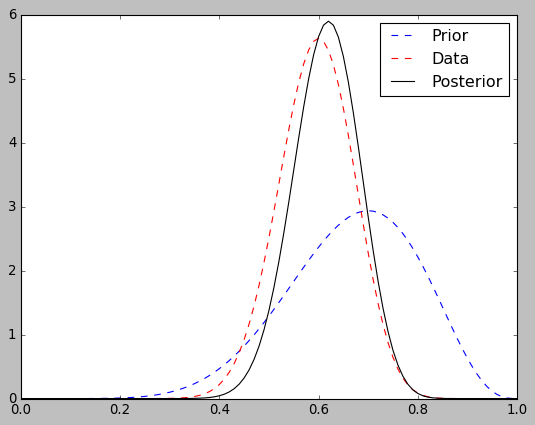

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, binom
plt.style.use('classic')

theta = np.linspace(0,1,101)
plt.plot(theta, beta.pdf(theta, 8,4),linestyle='dashed',color='blue',label='Prior') # a prior Beta(8,4) 
plt.plot(theta, binom.pmf(24,40,theta)*44,linestyle='dashed',color='red',label='Data') # experimental data: 40 tests, 24 successes. Note a scaling factor in there
plt.plot(theta, beta.pdf(theta, 32,20),color='black',label='Posterior') # the posterior, Beta(8+24, 4+40-24)
plt.legend(loc='best')
plt.show()

The posterior is between the prior and the data, more close to the data, which is because the data has more observations (40) than the prior (12 inferred)

### Cumulative Density Functions

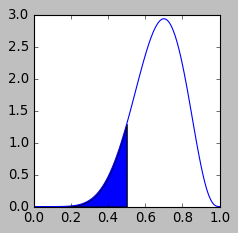

0.11328125000000001

In [10]:
plt.figure(figsize=(3,3))
plt.plot(theta, beta.pdf(theta, 8,4))
theta1 = np.linspace(0,0.5,51)
plt.fill_between(theta1, beta.pdf(theta1, 8,4))
plt.show()
beta.cdf(0.5,8,4) # the probability a beta(8,4) function is below a given X value 

### Percentage Points Function
Find the 95% equal tailed credible interval

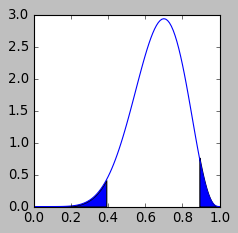

(0.39025744042757876, 0.8907365561809019)

In [14]:
plt.figure(figsize=(3,3))
plt.plot(theta, beta.pdf(theta, 8,4))
theta1 = np.linspace(0,beta.ppf(0.025,8,4),51)
theta2 = np.linspace(beta.ppf(0.975,8,4),1,51)
plt.fill_between(theta1, beta.pdf(theta1, 8,4))
plt.fill_between(theta2, beta.pdf(theta2, 8,4))
plt.show()

# calculate the lower and upper values of a range which contains 95% of observations
(beta.ppf(0.025,8,4),beta.ppf(0.975,8,4)) 

## Prior selection